✅ Model loaded from ocular_disease_resnet50_model.h5
160/160 [==============================] - 7s 35ms/step


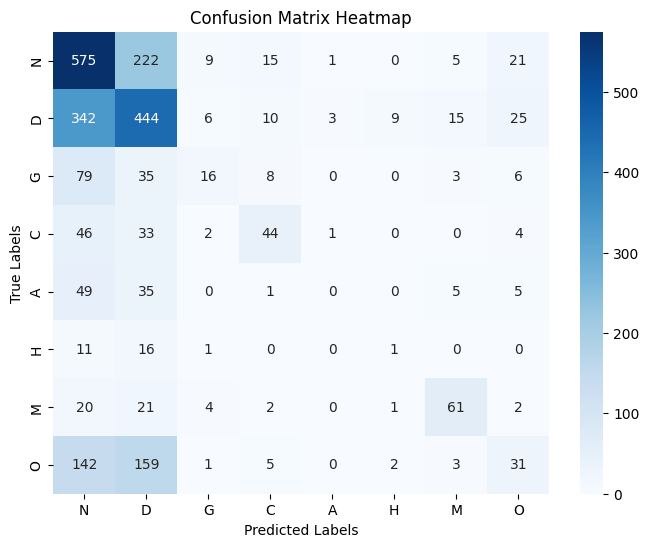

✅ Confusion matrix saved as 'confusion_matrix_resnet50.png'.


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# --------------------- Load the Model ---------------------
model_path = "ocular_disease_resnet50_model.h5"
model = load_model(model_path)
print(f"✅ Model loaded from {model_path}")

# --------------------- Define Constants ---------------------
IMG_SIZE = 224
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE
labels_list = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']  # Disease labels

# --------------------- Load the Dataset ---------------------
xlsx_path = r"C:\Users\Manas\IoT Research Models\full_df.xlsx"
df = pd.read_excel(xlsx_path)

# Prepare image file paths and corresponding targets
left_paths = df['Left-Fundus'].dropna().tolist()
right_paths = df['Right-Fundus'].dropna().tolist()
all_paths = left_paths + right_paths
df['target'] = df[labels_list].idxmax(axis=1)  # Get max probability label
all_targets = df['target'].dropna().tolist() * 2  # Duplicate for left & right images

# Map textual labels to integer indices
label_to_index = {label: idx for idx, label in enumerate(labels_list)}
target_indices = [label_to_index[label] for label in all_targets]

# Split dataset into training and validation sets
_, X_val_paths, _, y_val = train_test_split(
    all_paths, target_indices, test_size=0.2, random_state=42
)

# One-hot encode labels
y_val = to_categorical(y_val, num_classes=8)

# --------------------- Data Pipeline ---------------------
def process_image(file_path, label):
    image = tf.io.read_file(file_path)
    try:
        image = tf.image.decode_jpeg(image, channels=3)
    except Exception as e:
        tf.print(f"Error decoding {file_path}: {e}")
        image = tf.zeros([IMG_SIZE, IMG_SIZE, 3], dtype=tf.uint8)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

def create_dataset(file_paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    ds = ds.map(process_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)
    return ds

# Create validation dataset
val_ds = create_dataset(X_val_paths, y_val)

# --------------------- Generate Predictions ---------------------
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.concatenate([y for _, y in val_ds], axis=0), axis=1)

# --------------------- Generate Confusion Matrix ---------------------
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# --------------------- Plot Heatmap ---------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.savefig("confusion_matrix_resnet50.png")
plt.show()

print("✅ Confusion matrix saved as 'confusion_matrix_resnet50.png'.")

✅ Model loaded from ocular_disease_vgg16_model.h5
160/160 [==============================] - 14s 80ms/step


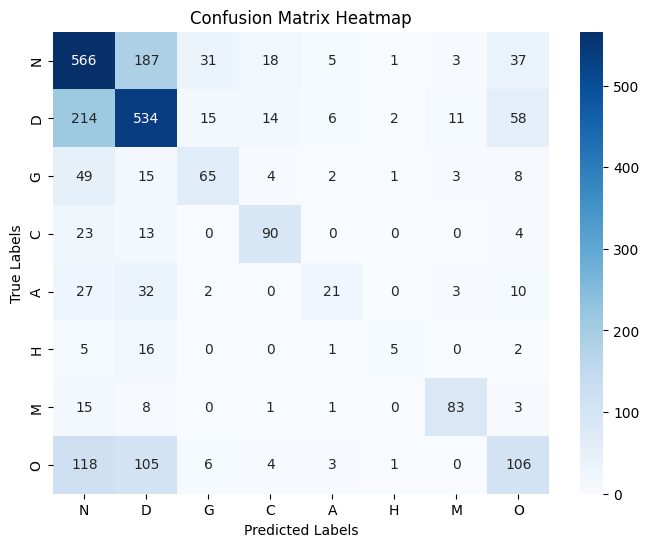

✅ Confusion matrix saved as 'confusion_matrix_vgg16.png'.


In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# --------------------- Load the Model ---------------------
model_path = "ocular_disease_vgg16_model.h5"
model = load_model(model_path)
print(f"✅ Model loaded from {model_path}")

# --------------------- Define Constants ---------------------
IMG_SIZE = 224
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE
labels_list = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']  # Disease labels

# --------------------- Load the Dataset ---------------------
xlsx_path = r"C:\Users\Manas\IoT Research Models\full_df.xlsx"
df = pd.read_excel(xlsx_path)

# Prepare image file paths and corresponding targets
left_paths = df['Left-Fundus'].dropna().tolist()
right_paths = df['Right-Fundus'].dropna().tolist()
all_paths = left_paths + right_paths
df['target'] = df[labels_list].idxmax(axis=1)  # Get max probability label
all_targets = df['target'].dropna().tolist() * 2  # Duplicate for left & right images

# Map textual labels to integer indices
label_to_index = {label: idx for idx, label in enumerate(labels_list)}
target_indices = [label_to_index[label] for label in all_targets]

# Split dataset into training and validation sets
_, X_val_paths, _, y_val = train_test_split(
    all_paths, target_indices, test_size=0.2, random_state=42
)

# One-hot encode labels
y_val = to_categorical(y_val, num_classes=8)

# --------------------- Data Pipeline ---------------------
def process_image(file_path, label):
    image = tf.io.read_file(file_path)
    try:
        image = tf.image.decode_jpeg(image, channels=3)
    except Exception as e:
        tf.print(f"Error decoding {file_path}: {e}")
        image = tf.zeros([IMG_SIZE, IMG_SIZE, 3], dtype=tf.uint8)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

def create_dataset(file_paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    ds = ds.map(process_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)
    return ds

# Create validation dataset
val_ds = create_dataset(X_val_paths, y_val)

# --------------------- Generate Predictions ---------------------
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.concatenate([y for _, y in val_ds], axis=0), axis=1)

# --------------------- Generate Confusion Matrix ---------------------
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# --------------------- Plot Heatmap ---------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.savefig("confusion_matrix_vgg16.png")
plt.show()

print("✅ Confusion matrix saved as 'confusion_matrix_vgg16.png'.")

✅ Model loaded from ocular_disease_inceptionv3_model.h5
160/160 [==============================] - 16s 88ms/step


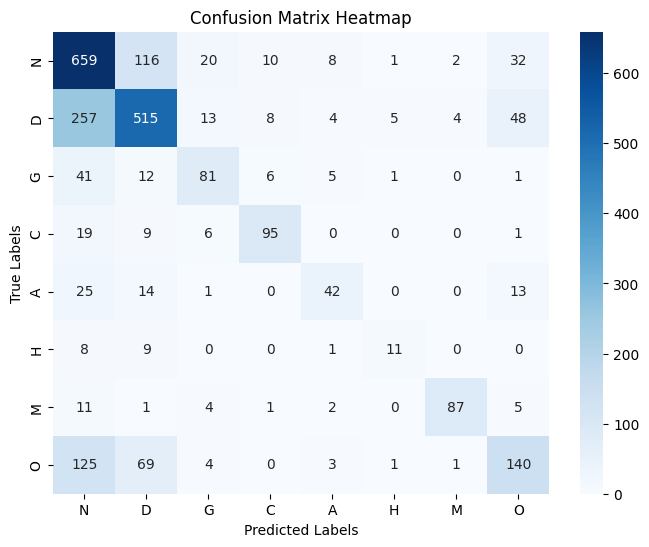

✅ Confusion matrix saved as 'confusion_matrix_inceptionv3.png'.


In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# --------------------- Load the Model ---------------------
model_path = "ocular_disease_inceptionv3_model.h5"
model = load_model(model_path)
print(f"✅ Model loaded from {model_path}")

# --------------------- Define Constants ---------------------
IMG_SIZE = 299
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE
labels_list = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']  # Disease labels

# --------------------- Load the Dataset ---------------------
xlsx_path = r"C:\Users\Manas\IoT Research Models\full_df.xlsx"
df = pd.read_excel(xlsx_path)

# Prepare image file paths and corresponding targets
left_paths = df['Left-Fundus'].dropna().tolist()
right_paths = df['Right-Fundus'].dropna().tolist()
all_paths = left_paths + right_paths
df['target'] = df[labels_list].idxmax(axis=1)  # Get max probability label
all_targets = df['target'].dropna().tolist() * 2  # Duplicate for left & right images

# Map textual labels to integer indices
label_to_index = {label: idx for idx, label in enumerate(labels_list)}
target_indices = [label_to_index[label] for label in all_targets]

# Split dataset into training and validation sets
_, X_val_paths, _, y_val = train_test_split(
    all_paths, target_indices, test_size=0.2, random_state=42
)

# One-hot encode labels
y_val = to_categorical(y_val, num_classes=8)

# --------------------- Data Pipeline ---------------------
def process_image(file_path, label):
    image = tf.io.read_file(file_path)
    try:
        image = tf.image.decode_jpeg(image, channels=3)
    except Exception as e:
        tf.print(f"Error decoding {file_path}: {e}")
        image = tf.zeros([IMG_SIZE, IMG_SIZE, 3], dtype=tf.uint8)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

def create_dataset(file_paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    ds = ds.map(process_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)
    return ds

# Create validation dataset
val_ds = create_dataset(X_val_paths, y_val)

# --------------------- Generate Predictions ---------------------
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.concatenate([y for _, y in val_ds], axis=0), axis=1)

# --------------------- Generate Confusion Matrix ---------------------
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# --------------------- Plot Heatmap ---------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.savefig("confusion_matrix_inceptionv3.png")
plt.show()

print("✅ Confusion matrix saved as 'confusion_matrix_inceptionv3.png'.")

✅ Model loaded from ocular_disease_densenet121_model.h5
160/160 [==============================] - 10s 42ms/step


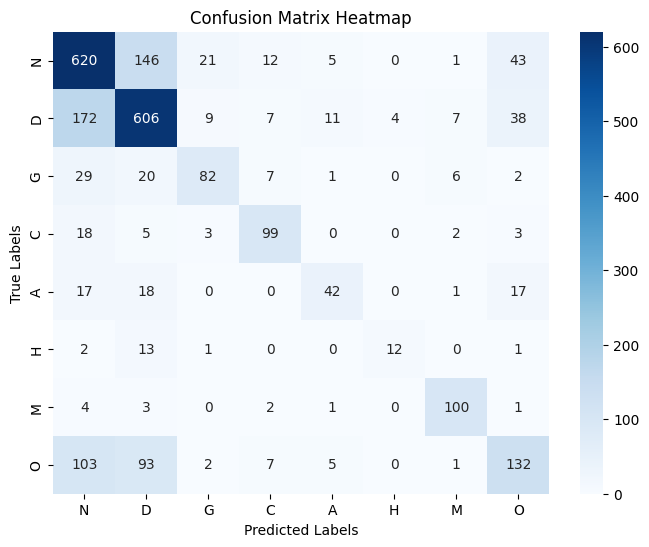

✅ Confusion matrix saved as 'confusion_matrix_densenet121.png'.


In [8]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# --------------------- Load the Model ---------------------
model_path = "ocular_disease_densenet121_model.h5"
model = load_model(model_path)
print(f"✅ Model loaded from {model_path}")

# --------------------- Define Constants ---------------------
IMG_SIZE = 224
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE
labels_list = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']  # Disease labels

# --------------------- Load the Dataset ---------------------
xlsx_path = r"C:\Users\Manas\IoT Research Models\full_df.xlsx"
df = pd.read_excel(xlsx_path)

# Prepare image file paths and corresponding targets
left_paths = df['Left-Fundus'].dropna().tolist()
right_paths = df['Right-Fundus'].dropna().tolist()
all_paths = left_paths + right_paths
df['target'] = df[labels_list].idxmax(axis=1)  # Get max probability label
all_targets = df['target'].dropna().tolist() * 2  # Duplicate for left & right images

# Map textual labels to integer indices
label_to_index = {label: idx for idx, label in enumerate(labels_list)}
target_indices = [label_to_index[label] for label in all_targets]

# Split dataset into training and validation sets
_, X_val_paths, _, y_val = train_test_split(
    all_paths, target_indices, test_size=0.2, random_state=42
)

# One-hot encode labels
y_val = to_categorical(y_val, num_classes=8)

# --------------------- Data Pipeline ---------------------
def process_image(file_path, label):
    image = tf.io.read_file(file_path)
    try:
        image = tf.image.decode_jpeg(image, channels=3)
    except Exception as e:
        tf.print(f"Error decoding {file_path}: {e}")
        image = tf.zeros([IMG_SIZE, IMG_SIZE, 3], dtype=tf.uint8)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

def create_dataset(file_paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    ds = ds.map(process_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)
    return ds

# Create validation dataset
val_ds = create_dataset(X_val_paths, y_val)

# --------------------- Generate Predictions ---------------------
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.concatenate([y for _, y in val_ds], axis=0), axis=1)

# --------------------- Generate Confusion Matrix ---------------------
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# --------------------- Plot Heatmap ---------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.savefig("confusion_matrix_densenet121.png")
plt.show()

print("✅ Confusion matrix saved as 'confusion_matrix_densenet121.png'.")